In [113]:
! pip install sweetviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sweetviz as sv

In [2]:
df = pd.read_csv('churn_data.csv')

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
#df = df.drop(['CustomerID', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1)
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [118]:
result = sv.analyze(df, "Churn Value", pairwise_analysis="on")
result.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
df = pd.read_csv('churn_data.csv')
# converts total charges from string to float
df['Total Charges'] = df['Total Charges'].replace(r'^\s*$', np.nan, regex=True)
df['Total Charges'] = df['Total Charges'].astype(float)
#choosing variables apart from latitude, longitude, zip code
df1 = df[['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method','Monthly Charges', 'Total Charges', 'CLTV','Churn Value']]
df1.head()


,Country,State,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
0,United States,California,Los Angeles,Male,No,No,No,2,Yes,No,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239,1
1,United States,California,Los Angeles,Female,No,No,Yes,2,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701,1
2,United States,California,Los Angeles,Female,No,No,Yes,8,Yes,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372,1
3,United States,California,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,5003,1
4,United States,California,Los Angeles,Male,No,No,Yes,49,Yes,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,5340,1


In [6]:
#one hot encodeing all variables
df_encoded = pd.get_dummies(df1, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents','Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'])

In [7]:
# Dropping dummy variables
#df_encoded = df_encoded.drop(['Gender_Female', 'Senior Citizen_No', 'Partner_No', 'Paperless Billing_No', 'Dependents_No', 'Phone Service_No', 'Multiple Lines_No', 'Internet Service_No', 'Online Security_No', 'Online Backup_No', 'Device Protection_No', 'Tech Support_No', 'Streaming TV_No', 'Streaming Movies_No', 'Contract_One year', 'Payment Method_Mailed check'], axis = 1)
df_encoded = df_encoded.drop(['Multiple Lines_No phone service', 'Online Security_No internet service', 'Online Backup_No internet service','Device Protection_No internet service', 'Tech Support_No internet service', 'Streaming TV_No internet service', 'Streaming Movies_No internet service', 'Gender_Female', 'Senior Citizen_No', 'Partner_No', 'Paperless Billing_No', 'Dependents_No', 'Phone Service_No', 'Multiple Lines_No', 'Internet Service_No', 'Online Security_No', 'Online Backup_No', 'Device Protection_No', 'Tech Support_No', 'Streaming TV_No', 'Streaming Movies_No', 'Contract_One year', 'Payment Method_Mailed check', 'Payment Method_Bank transfer (automatic)','Payment Method_Credit card (automatic)','Payment Method_Electronic check'], axis = 1)
# Scaling continuous variable
scaler = StandardScaler()
df_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']] = scaler.fit_transform(df_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']])
df_encoded.head()

,Country,State,City,Tenure Months,Monthly Charges,Total Charges,CLTV,Churn Value,Gender_Male,Senior Citizen_Yes,...,Internet Service_Fiber optic,Online Security_Yes,Online Backup_Yes,Device Protection_Yes,Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Contract_Month-to-month,Contract_Two year,Paperless Billing_Yes
0,United States,California,Los Angeles,-1.236724,-0.362660,-0.959649,-0.981675,1,1,0,...,0,1,1,0,0,0,0,1,0,1
1,United States,California,Los Angeles,-1.236724,0.197365,-0.940457,-1.436462,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,United States,California,Los Angeles,-0.992402,1.159546,-0.645369,0.821409,1,0,0,...,1,0,0,1,0,1,1,1,0,1
3,United States,California,Los Angeles,-0.177995,1.330711,0.336516,0.509483,1,0,0,...,1,0,0,1,1,1,1,1,0,1
4,United States,California,Los Angeles,0.677133,1.294151,1.214589,0.794358,1,1,0,...,1,0,1,1,0,1,1,1,0,1


# RFECV with Decision tree classifier

In [17]:
# Recursive Feature Elimination with Cross Validation

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Initialise RFECV object, use decision tree as classifier, roc_auc as the performance metric.
rfecv_dt = RFECV(
    estimator=DecisionTreeClassifier(random_state=0),
    min_features_to_select=5,
    step=1,
    scoring="roc_auc",
    cv=5
)

rfecv_dt.fit(X, y)


Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 featur

RFECV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
      min_features_to_select=5, scoring='roc_auc', verbose=True)

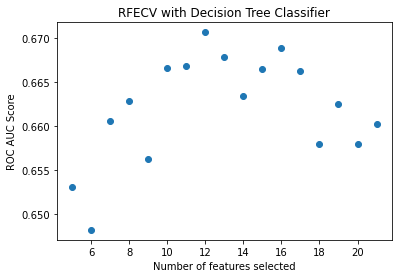

Optimal number of features: 12
ROC AUC score: 0.6688946352709063


In [21]:
# Plot the number of features vs. cross-validation scores
plt.figure()
plt.title('RFECV with Decision Tree Classifier')
plt.xlabel('Number of features selected')
plt.ylabel('ROC AUC Score')
plt.scatter(range(5, 22), rfecv_dt.grid_scores_)
plt.show()

# Print the optimal number of features and ROC AUC score
print('Optimal number of features:', rfecv_dt.n_features_)
print('ROC AUC score:', rfecv_dt.grid_scores_[rfecv_dt.n_features_ - 1])


In [22]:
# Get the columns that were chosen
selected_features = X.columns[rfecv_dt.support_]
print(selected_features)
print('', len(selected_features))

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV',
       'Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Internet Service_Fiber optic', 'Online Security_Yes',
       'Contract_Month-to-month', 'Paperless Billing_Yes'],
      dtype='object')
 12


# RFECV with SVC Kernal

In [24]:
# Recursive Feature Elimination with Cross Validation

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Initialise RFECV object, use svc as classifier, r2 as the performance metric.
rfecv_svc = RFECV(
    estimator=SVC(kernel='linear'),
    min_features_to_select=5,
    step=1,
    scoring="r2",
    cv=5,
)

rfecv_svc.fit(X, y)


RFECV(cv=5, estimator=SVC(kernel='linear'), min_features_to_select=5,
      scoring='r2')

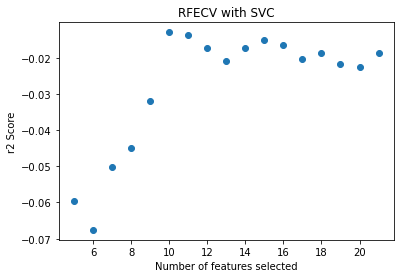

Optimal number of features: 10
ROC AUC score: -0.017317089848621882


In [25]:
# Plot the number of features vs. cross-validation scores
plt.figure()
plt.title('RFECV with SVC')
plt.xlabel('Number of features selected')
plt.ylabel('r2 Score')
plt.scatter(range(5, 22), rfecv_svc.grid_scores_)
plt.show()

# Print the optimal number of features and r2 score
print('Optimal number of features:', rfecv_svc.n_features_)
print('ROC AUC score:', rfecv_svc.grid_scores_[rfecv_svc.n_features_ - 1])

In [26]:
# Get the columns that were chosen
selected_features = X.columns[rfecv_svc.support_]
print(selected_features)
print('', len(selected_features))

Index(['Tenure Months', 'Dependents_Yes', 'Phone Service_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Online Security_Yes', 'Tech Support_Yes', 'Streaming TV_Yes',
       'Contract_Month-to-month', 'Paperless Billing_Yes'],
      dtype='object')
 10
